In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv("Mail_Phising.csv")
data.head(10)

,URL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,HTTPS_token,Result
0,1,1,-1,-1,-1,-1,-1
1,1,1,1,-1,0,-1,-1
2,0,1,1,-1,-1,-1,-1
3,0,1,1,-1,-1,-1,-1
4,0,1,1,-1,1,1,1
5,0,1,-1,-1,1,-1,1
6,0,1,1,-1,-1,1,-1
7,0,1,1,-1,-1,-1,-1
8,0,1,1,-1,1,-1,1
9,1,1,1,-1,-1,1,-1


In [ ]:
data.tail()

,URL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,HTTPS_token,Result
22105,-1,-1,1,1,1,1,1
22106,1,-1,-1,-1,1,1,-1
22107,-1,1,1,-1,1,1,-1
22108,-1,1,1,-1,-1,1,-1
22109,-1,1,1,-1,-1,1,-1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22110 entries, 0 to 22109
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   URL_Length                22110 non-null  int64
 1   having_At_Symbol          22110 non-null  int64
 2   double_slash_redirecting  22110 non-null  int64
 3   Prefix_Suffix             22110 non-null  int64
 4   having_Sub_Domain         22110 non-null  int64
 5   HTTPS_token               22110 non-null  int64
 6   Result                    22110 non-null  int64
dtypes: int64(7)
memory usage: 1.2 MB


In [ ]:
data.isnull().sum()

URL_Length                  0
having_At_Symbol            0
double_slash_redirecting    0
Prefix_Suffix               0
having_Sub_Domain           0
HTTPS_token                 0
Result                      0
dtype: int64

In [ ]:
data['Result'].value_counts()

Result
 1    12314
-1     9796
Name: count, dtype: int64

<Axes: xlabel='Result', ylabel='count'>

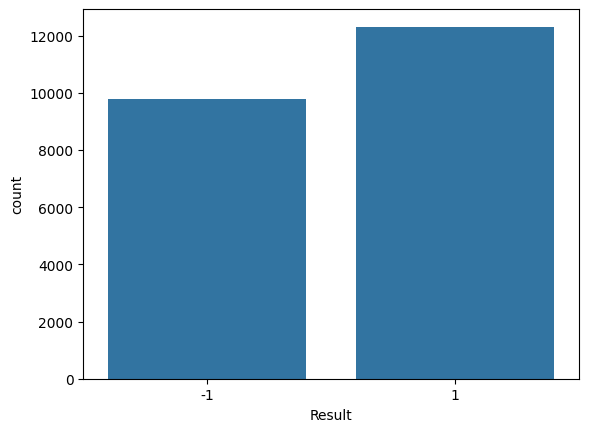

In [ ]:
sns.countplot(x='Result',data=data)

<ipython-input-8-5ddef0924ba4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Result'])


<Axes: >

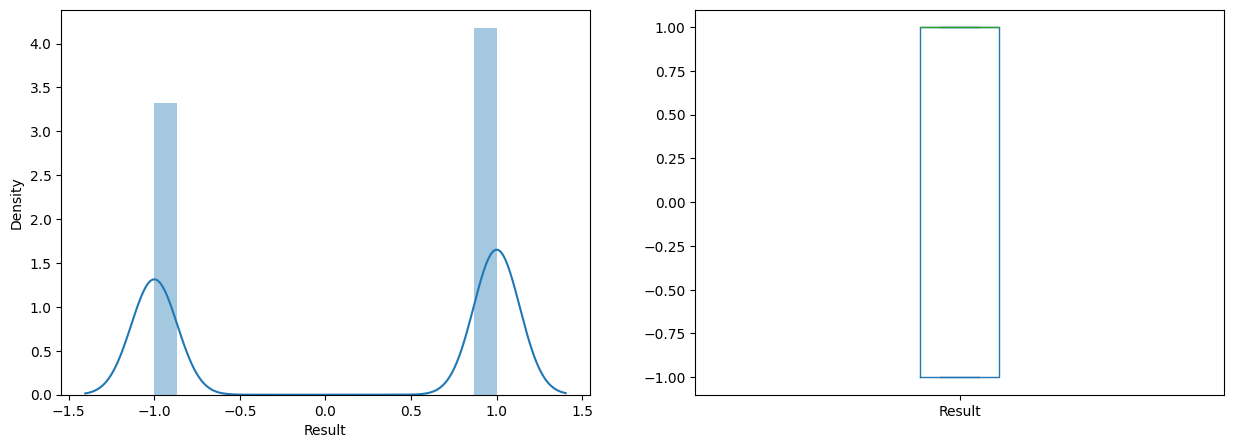

In [ ]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['Result'])
plt.subplot(122)
data['Result'].plot.box(figsize=(15,5))

<Axes: >

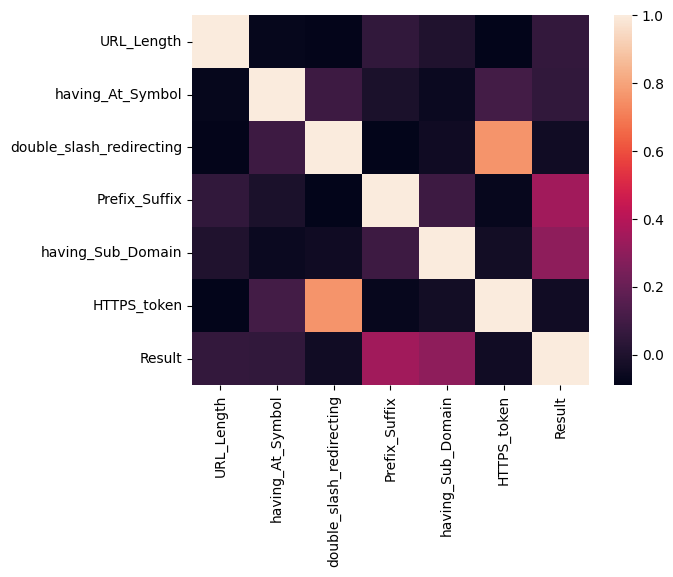

In [ ]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix)

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop(columns='Result',axis=1)
y=data['Result']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_hat=lg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_hat))
print(confusion_matrix(y_test,y_hat))
print(classification_report(y_test,y_hat))

0.7233529323081562
[[2232  651]
 [1184 2566]]
              precision    recall  f1-score   support

          -1       0.65      0.77      0.71      2883
           1       0.80      0.68      0.74      3750

    accuracy                           0.72      6633
   macro avg       0.73      0.73      0.72      6633
weighted avg       0.73      0.72      0.72      6633



In [ ]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)
y_hat2=gb.predict(x_test)
print(accuracy_score(y_test,y_hat2))
print(confusion_matrix(y_test,y_hat2))
print(classification_report(y_test,y_hat2))

0.5694255992763455
[[2883    0]
 [2856  894]]
              precision    recall  f1-score   support

          -1       0.50      1.00      0.67      2883
           1       1.00      0.24      0.39      3750

    accuracy                           0.57      6633
   macro avg       0.75      0.62      0.53      6633
weighted avg       0.78      0.57      0.51      6633



In [ ]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_hat3=dt.predict(x_test)
print(accuracy_score(y_test,y_hat3))
print(confusion_matrix(y_test,y_hat3))
print(classification_report(y_test,y_hat3))

0.7340569877883311
[[2344  539]
 [1225 2525]]
              precision    recall  f1-score   support

          -1       0.66      0.81      0.73      2883
           1       0.82      0.67      0.74      3750

    accuracy                           0.73      6633
   macro avg       0.74      0.74      0.73      6633
weighted avg       0.75      0.73      0.73      6633



In [ ]:
score_1=accuracy_score(y_test,y_hat)
score_2=accuracy_score(y_test,y_hat2)
score_3=accuracy_score(y_test,y_hat3)

Text(0.5, 1.0, 'Accuracy Comparison')

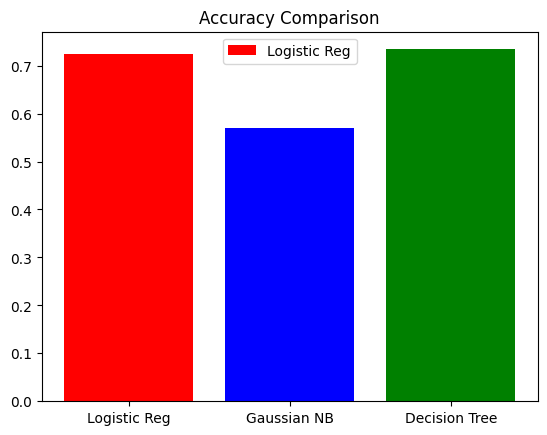

In [ ]:
names=['Logistic Reg','Gaussian NB','Decision Tree']
values=[score_1,score_2,score_3]
colors=['red','blue','green']
plt.bar(names,values,color=colors)
plt.legend(names)
plt.title('Accuracy Comparison')

<Axes: >

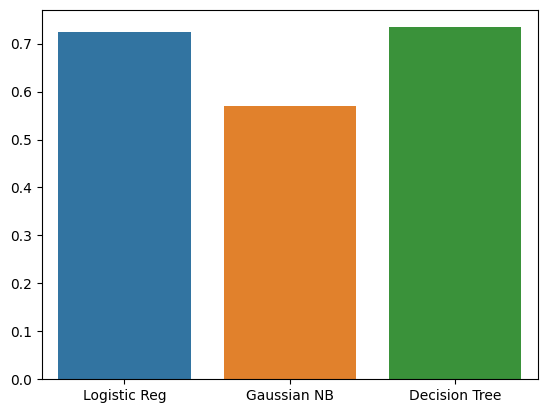

In [ ]:
sns.barplot(x=names,y=values,hue=names)

In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=85c4b48895d3a3f3d226632f5200213ebfb78c63f05e528c708e03d6cdd6c9d2
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
import anvil.server

In [ ]:
anvil.server.connect('server_4GR6WUQPYMZI35FB6UWLMSY2-FJXGGGV3E76FNX3S')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Published" as SERVER


In [ ]:
@anvil.server.callable
def Check(Link):
  Link=str(Link)
  cnt=0
  if len(Link)>=15:
    URL_Length=1
  elif len(Link)<15:
    URl_Length=-1
  if 'www' or 'https:' in Link:
    url=Link.split('.')
    if len(url[-1])>=1:
      Prefix_Suffix=1
    else:
      Prefix_Suffix=-1
  if '/' in Link:
    slash=Link.split('/')
    if len(slash[-1])>=1:
      having_Sub_Domain=1
    else:
      having_Sub_Domain=-1
  if 'https' in Link:
    HTTPS_token=1
  else:
    HTTPS_token=-1
  if '@' in Link:
    having_At_Symbol=1
  elif '@' not in Link:
    having_At_Symbol=-1
  if '//' in Link:
    cnt+=1
    if cnt>1:
      double_slash_redirecting=1
    else:
      double_slash_redirecting=-1

  print(URL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,HTTPS_token)
  real_pred=dt.predict([[URL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,HTTPS_token]])
  print(real_pred[0])
  if int(real_pred[0])==1:
    return "true"
  else:
    return "false"

In [ ]:
Link=str('www.google.com')
having_Sub_Domain=0
cnt=0
if len(Link)>=15:
  URL_Length=1
elif len(Link)<15:
  URl_Length=-1
if 'www' or 'https:' in Link:
  url=Link.split('.')
  if len(url[-1])>=1:
    Prefix_Suffix=1
  else:
    Prefix_Suffix=-1
if '/' in Link:
  slash=Link.split('/')
  if len(slash[-1])>=1:
    having_Sub_Domain=1
  else:
    having_Sub_Domain=-1
if 'https' in Link:
  HTTPS_token=1
else:
  HTTPS_token=-1
if '@' in Link:
  having_At_Symbol=1
elif '@' not in Link:
  having_At_Symbol=-1
if '//' in Link:
  cnt+=1
  if cnt>1:
    double_slash_redirecting=1
  else:
    double_slash_redirecting=-1

print(URL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,HTTPS_token)
real_pred=dt.predict([[URL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,HTTPS_token]])
print(real_pred[0])

1 -1 -1 1 0 -1
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
anvil.server.wait_forever

<function anvil.server.wait_forever()>